In [18]:
import practicalSPARQL
import pandas as pd

In [19]:
root_q = 'queries'
root_d = 'results'

# read login data
login = pd.read_json('config_sparql.json')
ENDPOINT = login['endpoint'][0]
USERNAME = login['username'][0]
PASSWORD = login['password'][0]

# create sparql object
sparql = practicalSPARQL.practicalWrapper(ENDPOINT)
sparql.setCredentials(USERNAME, PASSWORD)

print("--- Querying ENDPOINT: {} ---".format(ENDPOINT))

--- Querying ENDPOINT: http://devmeta.sphaera.mpiwg-berlin.mpg.de/sparql ---


In [20]:
q = practicalSPARQL.stringify_SPARQL('books_query.sparql')
df = sparql.select_as_dataframe(q)

C:\Users\nogas\AppData\Local\Temp\ipykernel_1132\847579124.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  unique_books_per_interval = df.groupby('interval')['book'].nunique().reset_index(name='unique_books')
C:\Users\nogas\AppData\Local\Temp\ipykernel_1132\847579124.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  most_common_cities = df.groupby(['interval', 'place']).size().reset_index(name='count')
C:\Users\nogas\AppData\Local\Temp\ipykernel_1132\847579124.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=Fals

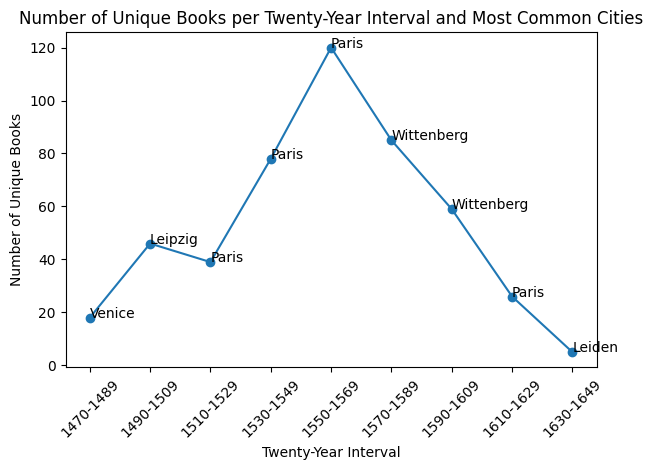

In [23]:
# Clean 'year' column by converting to numeric and dropping rows with invalid years
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df = df.dropna(subset=['year'])
df['year'] = df['year'].astype(int)

# Create twenty-year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

df['interval'] = pd.cut(df['year'], bins=bins, labels=labels, right=False)

# Group and count unique books
unique_books_per_interval = df.groupby('interval')['book'].nunique().reset_index(name='unique_books')

# Find most common cities
most_common_cities = df.groupby(['interval', 'place']).size().reset_index(name='count')
most_common_cities = most_common_cities.loc[most_common_cities.groupby('interval')['count'].idxmax()].reset_index(drop=True)
most_common_cities = most_common_cities[['interval', 'place']]

# Merge results
result = pd.merge(unique_books_per_interval, most_common_cities, on='interval')

# Plot the results
fig, ax = plt.subplots()

ax.plot(result['interval'], result['unique_books'], marker='o')

# Annotate the most common cities
for i, txt in enumerate(result['place']):
    ax.annotate(txt, (result['interval'][i], result['unique_books'][i]))

plt.xlabel('Twenty-Year Interval')
plt.ylabel('Number of Unique Books')
plt.title('Number of Unique Books per Twenty-Year Interval and Most Common Cities')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [24]:
q = practicalSPARQL.stringify_SPARQL('elements_query_180724.sparql')
df_images = sparql.select_as_dataframe(q)

C:\Users\nogas\AppData\Local\Temp\ipykernel_1132\1860389548.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  unique_images_per_book_interval = df_images.groupby(['interval', 'book'])['images'].nunique().groupby('interval').sum().reset_index(name='unique_images')
C:\Users\nogas\AppData\Local\Temp\ipykernel_1132\1860389548.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  unique_images_per_book_interval = df_images.groupby(['interval', 'book'])['images'].nunique().groupby('interval').sum().reset_index(name='unique_images')
C:\Users\nogas\AppData\Local\Temp\ipykernel_1132\1860389548.py:16: FutureWarning: 

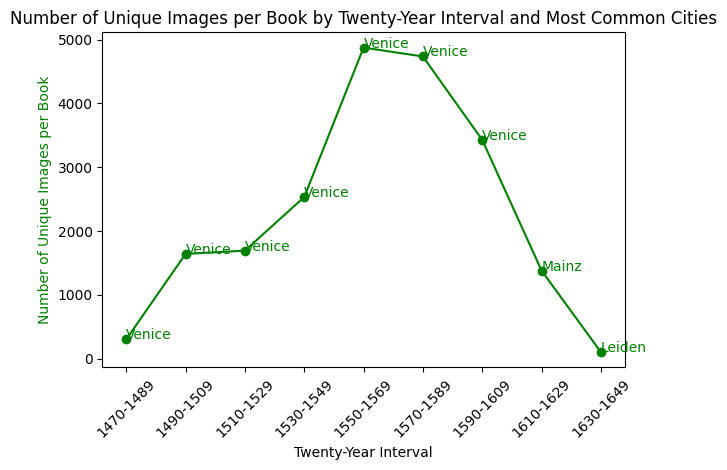

In [27]:
# Clean 'year' column
df_images['year'] = pd.to_numeric(df_images['year'], errors='coerce')
df_images.dropna(subset=['year'], inplace=True)
df_images['year'] = df_images['year'].astype(int)

# Create twenty-year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

df_images['interval'] = pd.cut(df_images['year'], bins=bins, labels=labels, right=False)

# Group and count unique images per book
unique_images_per_book_interval = df_images.groupby(['interval', 'book'])['images'].nunique().groupby('interval').sum().reset_index(name='unique_images')

# Find most common cities
most_common_cities_images = df_images.groupby(['interval', 'place']).size().reset_index(name='count')
most_common_cities_images = most_common_cities_images.loc[most_common_cities_images.groupby('interval')['count'].idxmax()].reset_index(drop=True)
most_common_cities_images = most_common_cities_images[['interval', 'place']]

# Merge results
result_images = pd.merge(unique_images_per_book_interval, most_common_cities_images, on='interval')

# Plot the results
fig, ax = plt.subplots()

ax.plot(result_images['interval'], result_images['unique_images'], marker='o', color='green', label='Unique Images per Book')
ax.set_xlabel('Twenty-Year Interval')
ax.set_ylabel('Number of Unique Images per Book', color='green')

# Annotate the most common cities for df_images
for i, txt in enumerate(result_images['place']):
    ax.annotate(txt, (result_images['interval'][i], result_images['unique_images'][i]), color='green')

plt.title('Number of Unique Images per Book by Twenty-Year Interval and Most Common Cities')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

C:\Users\nogas\AppData\Local\Temp\ipykernel_1132\85118364.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  images_per_book = df_images.groupby(['interval', 'book'])['images'].count().reset_index(name='image_count')
C:\Users\nogas\AppData\Local\Temp\ipykernel_1132\85118364.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_cities = df_images.groupby(['interval', 'place']).size().reset_index(name='count')
C:\Users\nogas\AppData\Local\Temp\ipykernel_1132\85118364.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=Fa

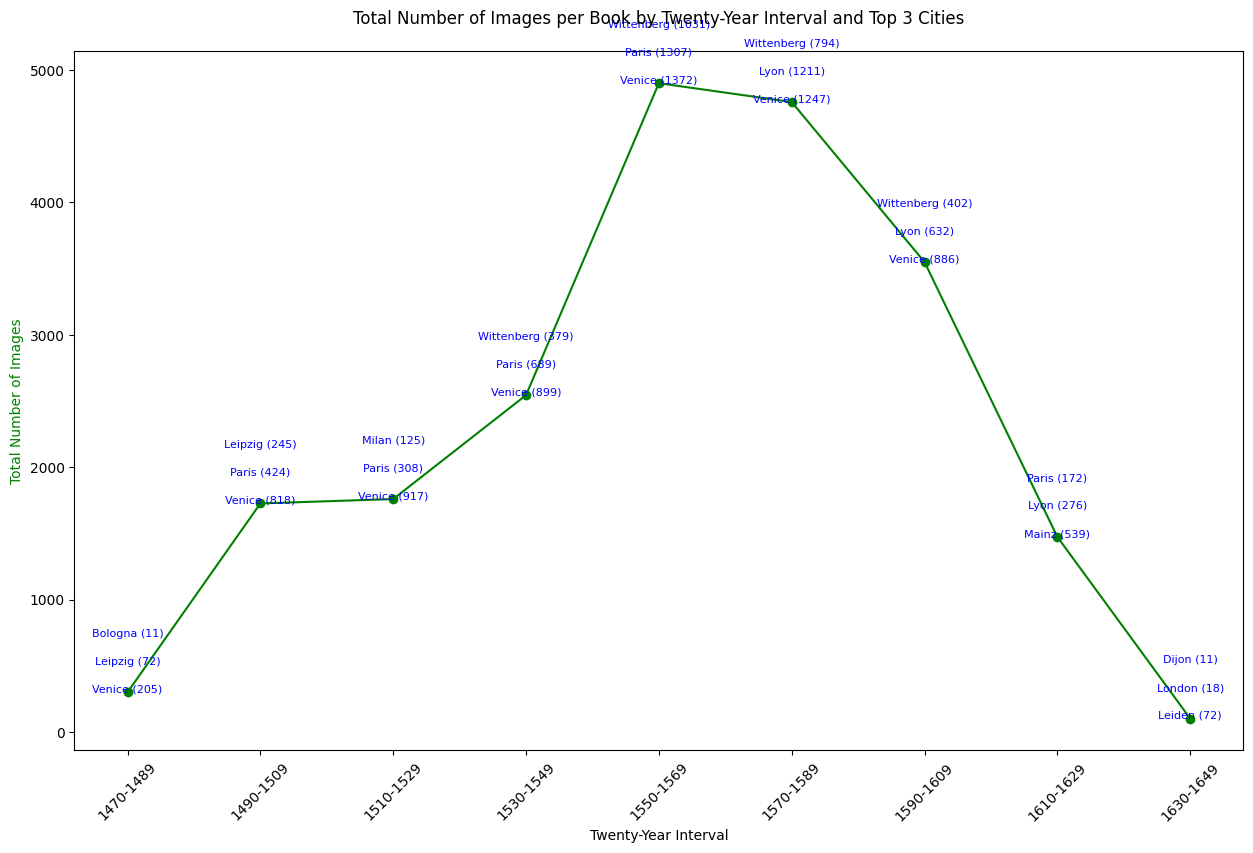

In [34]:
# Clean 'year' column
df_images['year'] = pd.to_numeric(df_images['year'], errors='coerce')
df_images.dropna(subset=['year'], inplace=True)
df_images['year'] = df_images['year'].astype(int)

# Create twenty-year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

df_images['interval'] = pd.cut(df_images['year'], bins=bins, labels=labels, right=False)

# Count the number of images per book
images_per_book = df_images.groupby(['interval', 'book'])['images'].count().reset_index(name='image_count')

# Find top 3 cities with the highest number of books for each interval
top_cities = df_images.groupby(['interval', 'place']).size().reset_index(name='count')
top_cities = top_cities.sort_values(by=['interval', 'count'], ascending=[True, False])
top_cities = top_cities.groupby('interval').head(3).reset_index(drop=True)  # Select top 3 cities

# Aggregate the total image count per interval
total_images_per_interval = images_per_book.groupby('interval')['image_count'].sum().reset_index(name='total_images')

# Plot the results with a larger figure size
fig, ax = plt.subplots(figsize=(14, 10))  # Increase figure size for better readability

ax.plot(total_images_per_interval['interval'], total_images_per_interval['total_images'], marker='o', color='green', label='Total Images per Book')
ax.set_xlabel('Twenty-Year Interval')
ax.set_ylabel('Total Number of Images', color='green')

# Annotate the top 3 cities with adjusted font size and position
for interval in top_cities['interval'].unique():
    cities = top_cities[top_cities['interval'] == interval]
    for i, (place, count) in enumerate(zip(cities['place'], cities['count'])):
        # Adjust annotation position to avoid overlap
        ax.annotate(f'{place} ({count})',
                    (interval, total_images_per_interval[total_images_per_interval['interval'] == interval]['total_images'].values[0]),
                    textcoords="offset points",
                    xytext=(0, 20 * i),  # Increased offset for clarity
                    ha='center',
                    fontsize=8,  # Smaller font size
                    color='blue')

plt.title('Total Number of Images per Book by Twenty-Year Interval and Top 3 Cities', pad=20)  # Increase padding above title
plt.xticks(rotation=45)
plt.tight_layout(pad=6)  # Adjust layout padding for better spacing

plt.show()